In [1]:
import os
from Utils.visualization import *

# Words

Precision:0.7096, Recall:0.5688, F1-score:0.6314, Accuraci:0.6680, AUC:0.7135


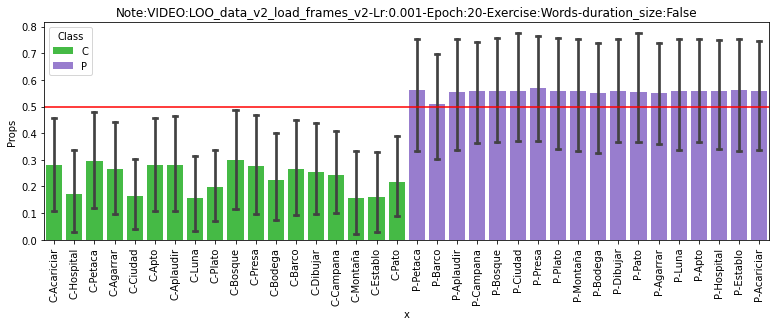

In [2]:
data_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False.csv'
view_results(data_path)
plot_results(data_path, 'Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False', 'Exercise_g')

Precision:0.6165, Recall:0.5529, F1-score:0.5830, Accuraci:0.6045, AUC:0.6542


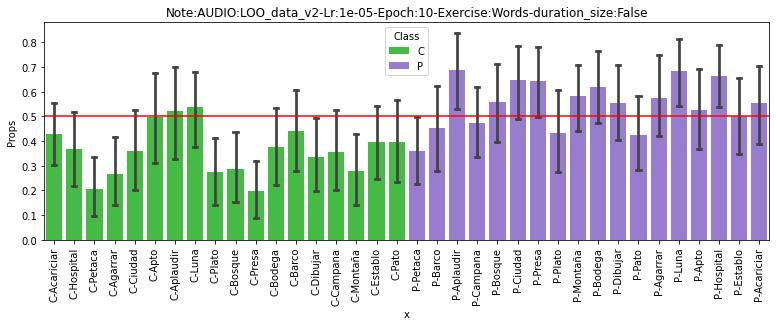

In [3]:
data_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv'
view_results(data_path)
plot_results(data_path, 'Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False', 'Exercise_g')

Precision:0.7096, Recall:0.5688, F1-score:0.6314, Accuraci:0.6680, AUC:0.7135


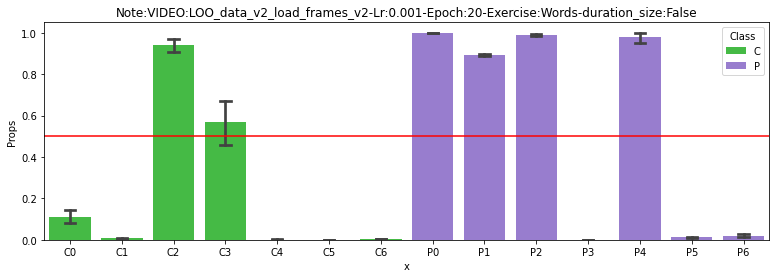

In [4]:
data_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False.csv'
view_results(data_path)
plot_results(data_path, 'Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False', 'Sample_ids')

Precision:0.6165, Recall:0.5529, F1-score:0.5830, Accuraci:0.6045, AUC:0.6542


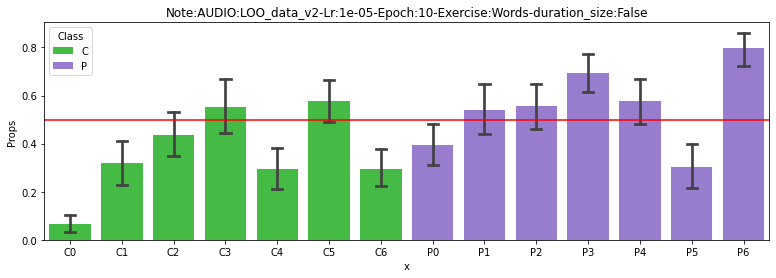

In [5]:
data_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv'
view_results(data_path)
plot_results(data_path, 'Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False', 'Sample_ids')

Precision:0.6165, Recall:0.5529, F1-score:0.5830, Accuraci:0.6045, AUC:0.7448


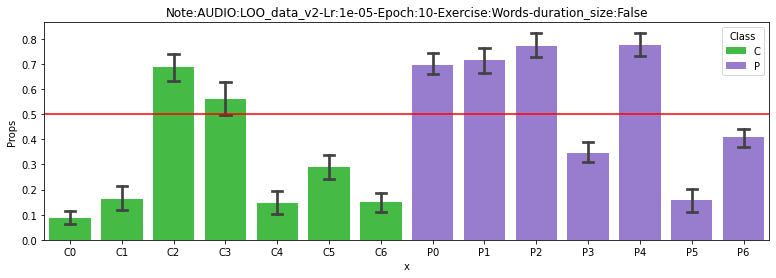

In [6]:
mean_fusion('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv',
            'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False.csv',
            'Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False',
            'Sample_ids')

Precision:0.6165, Recall:0.5529, F1-score:0.5830, Accuraci:0.6045, AUC:0.7448


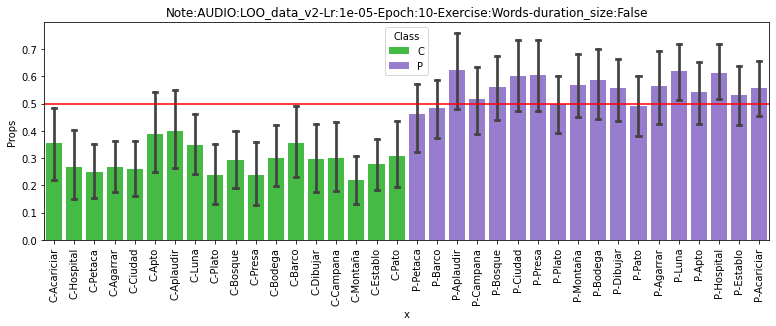

In [7]:
mean_fusion('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv',
            'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False.csv',
            'Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False',
            'Exercise_g')

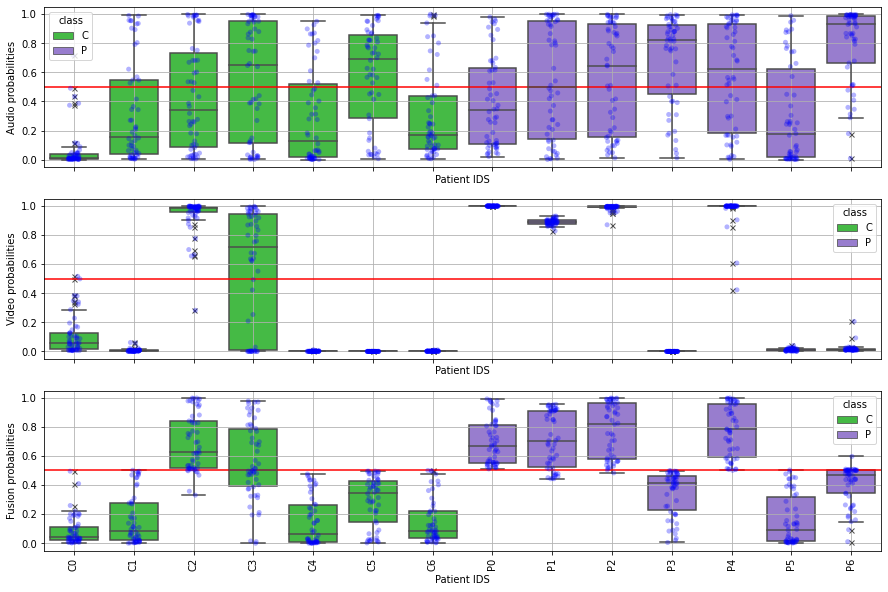

In [3]:
from Utils.visualization import *

generate_final_visualization('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv',
                             'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False.csv',
                             'Words',
                             'Patient IDS')

# Phonemes

Precision:0.7391, Recall:0.5397, F1-score:0.6239, Accuraci:0.6746, AUC:0.7506


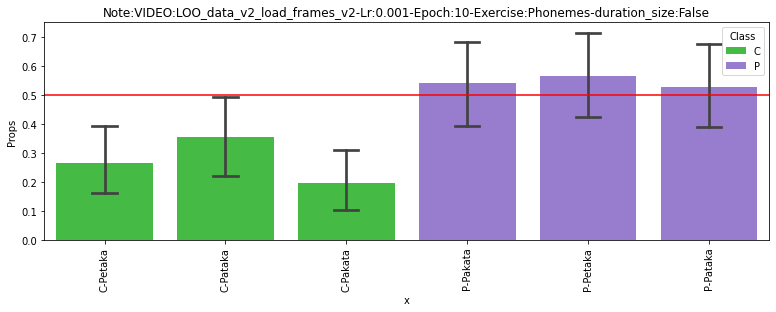

In [8]:
data_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False.csv'
view_results(data_path)
plot_results(data_path, 'Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False', 'Exercise_g')

Precision:0.6731, Recall:0.5556, F1-score:0.6087, Accuraci:0.6429, AUC:0.6644


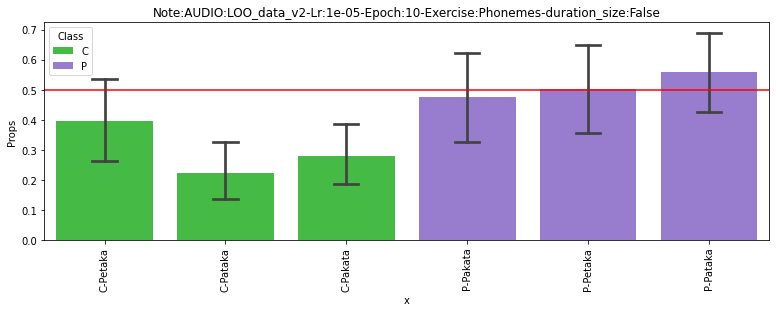

In [9]:
data_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False.csv'
view_results(data_path)
plot_results(data_path, 'Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False', 'Exercise_g')

Precision:0.7391, Recall:0.5397, F1-score:0.6239, Accuraci:0.6746, AUC:0.7506


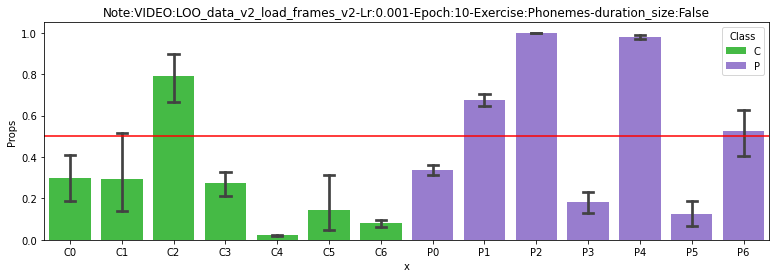

In [10]:
data_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False.csv'
view_results(data_path)
plot_results(data_path, 'Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False', 'Sample_ids')

Precision:0.6731, Recall:0.5556, F1-score:0.6087, Accuraci:0.6429, AUC:0.6644


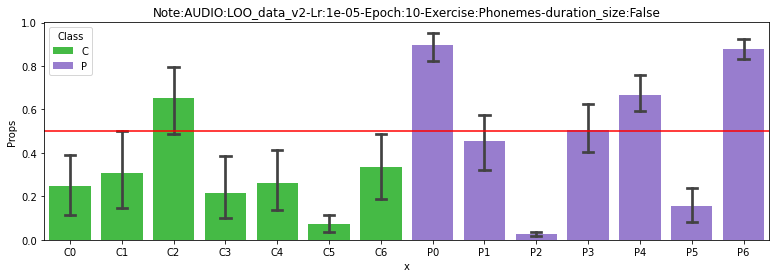

In [11]:
data_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False.csv'
view_results(data_path)
plot_results(data_path, 'Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False', 'Sample_ids')

Precision:0.6731, Recall:0.5556, F1-score:0.6087, Accuraci:0.6429, AUC:0.7755


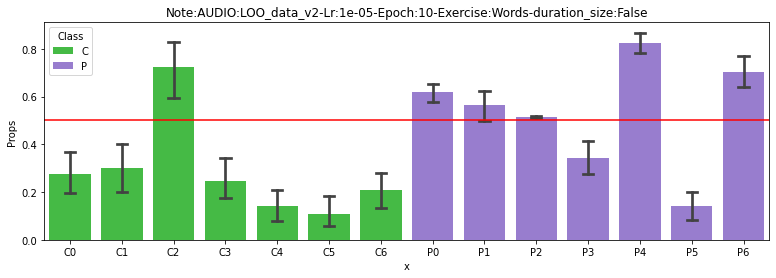

In [12]:
mean_fusion('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False.csv',
            'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False.csv',
            'Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False',
            'Sample_ids')

Precision:0.6731, Recall:0.5556, F1-score:0.6087, Accuraci:0.6429, AUC:0.7755


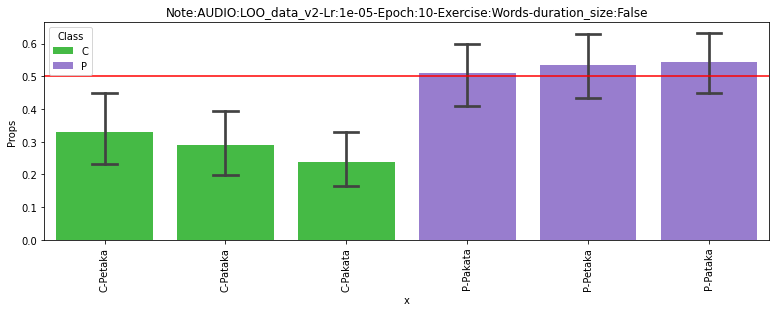

In [13]:
mean_fusion('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False.csv',
            'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False.csv',
            'Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False',
            'Exercise_g')

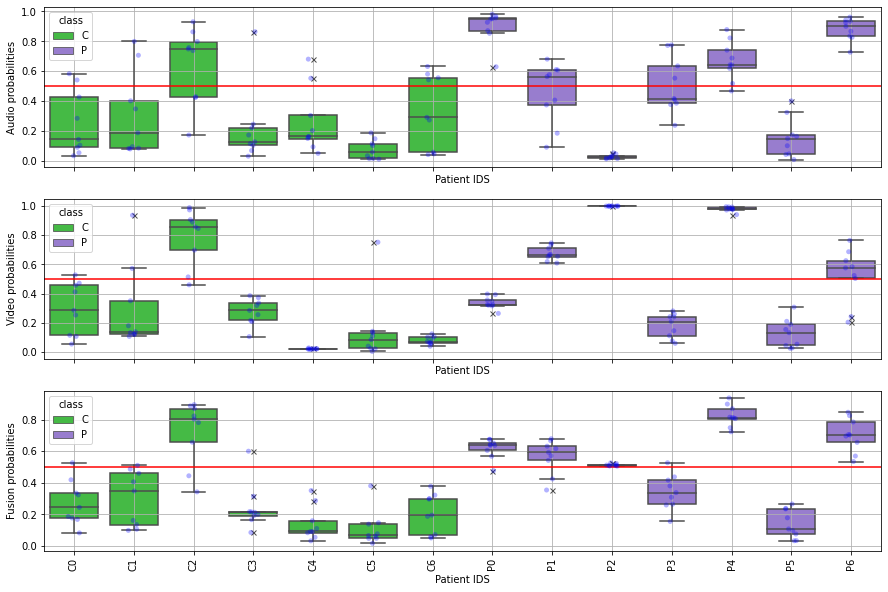

In [2]:
from Utils.visualization import *

generate_final_visualization('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False.csv',
                             'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False.csv',
                             'Phonemes',
                             'Patient IDS')

# Vowels

Precision:0.8750, Recall:0.4000, F1-score:0.5490, Accuraci:0.6667, AUC:0.7156


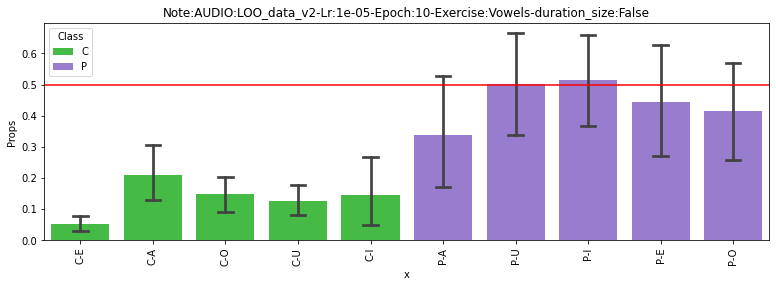

In [14]:
data_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:7e-05-Epoch:7-Exercise:Vowels-duration_size:False.csv'
view_results(data_path)
plot_results(data_path, 'Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Vowels-duration_size:False', 'Exercise_g')

Precision:0.4964, Recall:0.6571, F1-score:0.5656, Accuraci:0.4879, AUC:0.4500


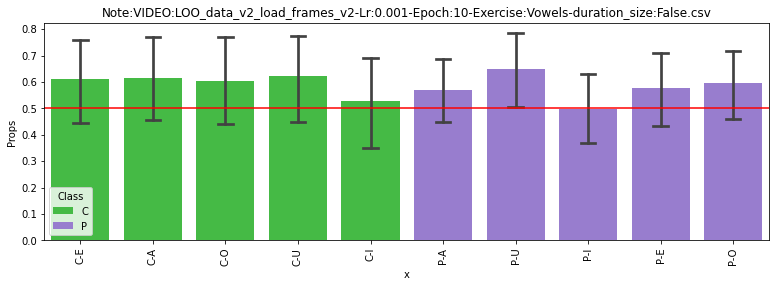

In [15]:
data_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Vowels-duration_size:False.csv'
view_results(data_path)
plot_results(data_path, 'Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Vowels-duration_size:False.csv', 'Exercise_g')

Precision:0.8750, Recall:0.4000, F1-score:0.5490, Accuraci:0.6667, AUC:0.7156


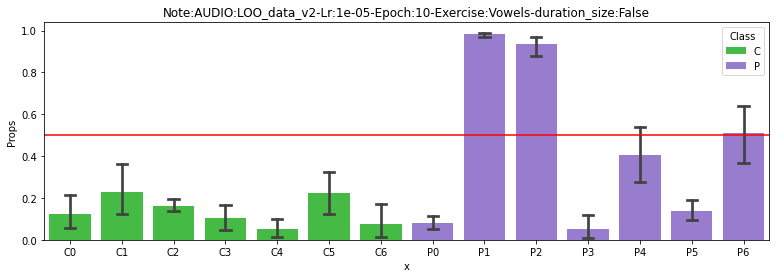

In [16]:
data_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:7e-05-Epoch:7-Exercise:Vowels-duration_size:False.csv'
view_results(data_path)
plot_results(data_path, 'Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Vowels-duration_size:False', 'Sample_ids')

Precision:0.4964, Recall:0.6571, F1-score:0.5656, Accuraci:0.4879, AUC:0.4500


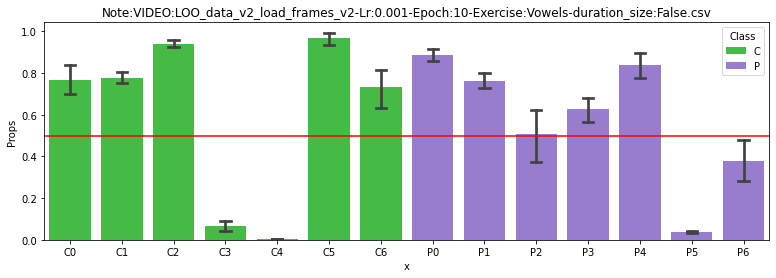

In [17]:
data_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Vowels-duration_size:False.csv'
view_results(data_path)
plot_results(data_path, 'Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Vowels-duration_size:False.csv', 'Sample_ids')

Precision:0.8750, Recall:0.4000, F1-score:0.5490, Accuraci:0.6667, AUC:0.6445


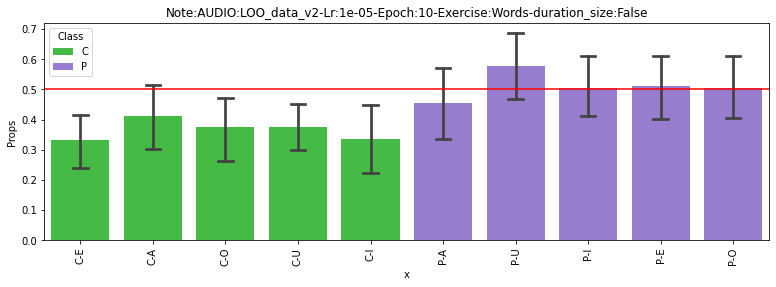

In [18]:
mean_fusion('Results/Note:AUDIO:LOO_data_v2-Lr:7e-05-Epoch:7-Exercise:Vowels-duration_size:False.csv',
            'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Vowels-duration_size:False.csv',
            'Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False',
            'Exercise_g')

Precision:0.8750, Recall:0.4000, F1-score:0.5490, Accuraci:0.6667, AUC:0.6445


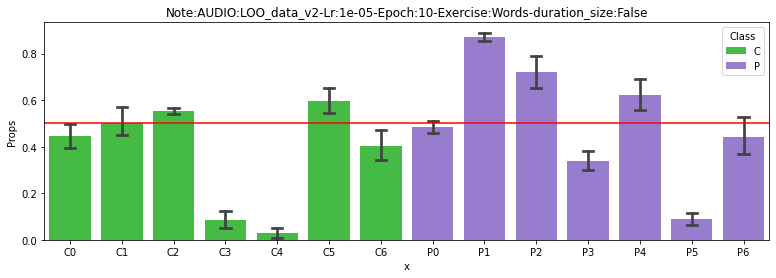

In [19]:
mean_fusion('Results/Note:AUDIO:LOO_data_v2-Lr:7e-05-Epoch:7-Exercise:Vowels-duration_size:False.csv',
            'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Vowels-duration_size:False.csv',
            'Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False',
            'Sample_ids')

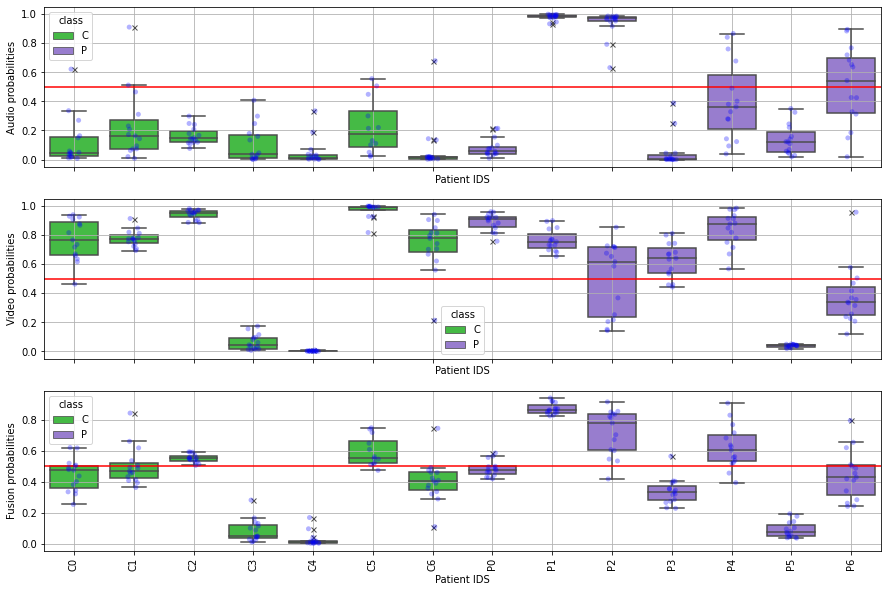

In [1]:
from Utils.visualization import *

generate_final_visualization('Results/Note:AUDIO:LOO_data_v2-Lr:7e-05-Epoch:7-Exercise:Vowels-duration_size:False.csv',
                             'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Vowels-duration_size:False.csv',
                             'Vowels',
                             'Patient IDS')